# **K-Means Clustering**
_____

In this notebook, **K-Means Clustering** will be explored in various ways using the **Texas Weather** dataset in oder to achieve some understanding of this unsupervised machinle learning algorithm.

### **Objectives :**

- Comprehend the basic concept of K-Means Clustering.
- Peform data exploration and visualization.
- Explore techniques in K-Means clustering and the math behind it.
- Build K-Means Clustering model for a weather pattern clustering.

______

## **What is K-Means Clustering ?**

K-Means Clustering is an unsupervised learning algorithm that is used to find groups or patterns in unlabeled data.  The fundamental concept is to separate a dataset into K discrete, non-overlapping groups (also known as "clusters"), with each data point falling into the cluster that has the centroid, or closest mean value.


### **Techniques to achieve K-Means Clustering**

1. Deciding how many clusters (K) to create.

2. K centroids are initialized at random.

3. Each data point is assigned to the closest centroid.

4. Adjusting the centroids in accordance with the average of the points allotted.

5. Steps 3–4 are repeated until convergence, or when centroids cease to change significantly.

*Let's prepare the dataset to build a clustering model by following these steps*

____ 

## **Data Exploration**

The Texas Weather dataset shall be the main and only dataset for this notebook. In this section various techniques shall be implemented to explore and gain some insights into the data.

### Import Required Libraries

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Load Data

In [3]:
df = pd.read_csv('../../weather_data.csv')

df.head()

,date,max_temp,min_temp,humidity,wind_speed,precipitation,pressure,solar_radiation
0,2019-01-01,87.5,59.5,67.2,8.3,0.07,1013.2,273.3
1,2019-01-02,84.7,72.4,75.4,10.8,0.14,1013.6,265.2
2,2019-01-03,88.9,65.2,79.2,12.2,0.07,1011.0,312.8
3,2019-01-04,93.6,66.1,75.2,13.0,0.05,1014.4,232.4
4,2019-01-05,85.2,69.9,70.0,10.2,0.05,1013.2,280.9


### List the Columns in the Dataset

In [4]:
df.columns

Index(['date', 'max_temp', 'min_temp', 'humidity', 'wind_speed',
       'precipitation', 'pressure', 'solar_radiation'],
      dtype='object')

### Number of data in each column

In [5]:
df.isnull().count()

date               1826
max_temp           1826
min_temp           1826
humidity           1826
wind_speed         1826
precipitation      1826
pressure           1826
solar_radiation    1826
dtype: int64

### Checking the Data Types in Each Column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1826 non-null   object 
 1   max_temp         1826 non-null   float64
 2   min_temp         1826 non-null   float64
 3   humidity         1826 non-null   float64
 4   wind_speed       1826 non-null   float64
 5   precipitation    1826 non-null   float64
 6   pressure         1826 non-null   float64
 7   solar_radiation  1826 non-null   float64
dtypes: float64(7), object(1)
memory usage: 114.2+ KB


There is an object type in the dataset. This could be a problem later. Let's change it to an appropriate datetime format. 

_____

## **Data Cleaning**

This step is very important in order to make sure the data is in the best shape for analysis and model development

### Correcting Data For Date Type

In [7]:
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1826 non-null   datetime64[ns]
 1   max_temp         1826 non-null   float64       
 2   min_temp         1826 non-null   float64       
 3   humidity         1826 non-null   float64       
 4   wind_speed       1826 non-null   float64       
 5   precipitation    1826 non-null   float64       
 6   pressure         1826 non-null   float64       
 7   solar_radiation  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 114.2 KB


### Checking for Null values

In [8]:
df.isnull().sum()

date               0
max_temp           0
min_temp           0
humidity           0
wind_speed         0
precipitation      0
pressure           0
solar_radiation    0
dtype: int64

No null values present

### Checking for duplicates

In [8]:
duplicates = df.duplicated().sum()
print(f"Duplicates in the dataset: {duplicates}")

Duplicates in the dataset: 0


______

## **Feature Distribution and Data Visualisations**

In this section, graphs and plots shall be used to analyze the data to gain deeper insights.

### **Distribution of High Temperature vs Humidity**

The aim of this plot is to show how the distribution of humidity and high temperature are in relation to each other.


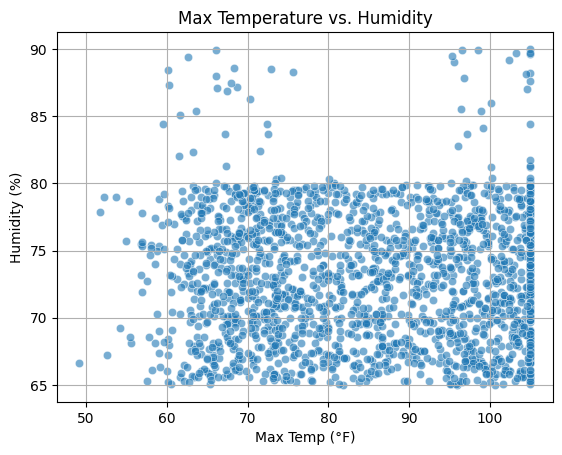

In [14]:
sb.scatterplot(data=df, x='max_temp', y='humidity', alpha=0.6)
plt.title('Max Temperature vs. Humidity')
plt.xlabel('Max Temp (°F)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()



**Intepreatation of the graph**

- **Data clustering:** Throughout the whole range of maximum temperatures, the majority of points are grouped between 65% and 80% humidity.  This implies that humidity, independent of temperature, tends to remain within this range.

- **Sparse high humidity values:** This dataset shows a lower frequency of extremely humid situations, as evidenced by the smaller number of data points above 80% humidity.

- **No obvious linear correlation:** Since humidity doesn't routinely rise or fall with temperature, temperature and humidity in this dataset might not be related.

This suggests that humidity levels tend to stay within a consistent range, regardless of how high temperatures get.

### The **Distribution of Wind Speed vs Precipitation**

The aim of this plot is to show how the distribution of wind speed and prepcipitation are in relation to each other.

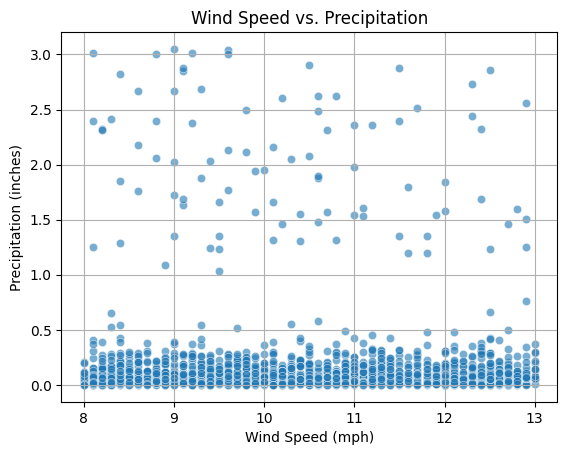

In [15]:
sb.scatterplot(data=df, x='wind_speed', y='precipitation', alpha=0.6)
plt.title('Wind Speed vs. Precipitation')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Precipitation (inches)')
plt.grid(True)
plt.show()



**Interpretation of the Graph**

- **Data clustering:** Across all wind speeds, the majority of data points are concentrated at low precipitation amounts (less than 0.5 inches).

- **Sparse high precipitation values:** This dataset indicates that heavy rainfall is less frequent because there are fewer data points at higher precipitation levels.

With about 400 occurrences, the cold category is the least frequent, suggesting that colder temperatures are less usual.

The distribution implies that hot temperatures are substantially more common than both mild and cold temperatures, which could point to a seasonal trend in the environment.


____

## **Feature Engineering**

Feature engineering shall be pformed on the 'date' column to extract the months from it and include a month column . This will assist with the clustering task.



In [16]:
# Extract month
df['month'] = df['date'].dt.month

df.head()

,date,max_temp,min_temp,humidity,wind_speed,precipitation,pressure,solar_radiation,month
0,2019-01-01,87.5,59.5,67.2,8.3,0.07,1013.2,273.3,1
1,2019-01-02,84.7,72.4,75.4,10.8,0.14,1013.6,265.2,1
2,2019-01-03,88.9,65.2,79.2,12.2,0.07,1011.0,312.8,1
3,2019-01-04,93.6,66.1,75.2,13.0,0.05,1014.4,232.4,1
4,2019-01-05,85.2,69.9,70.0,10.2,0.05,1013.2,280.9,1


_______

## **Weather Pattern Clustering**

In this section, K-Means clustering will be used to group thae days into 3 weather clusters.

Firstly, a peek into the math and logic behind K-Means Clustering. The aim is to group days with similar weather patterns.


### **The Math Behind K-Means Clustering**

When it comes to comes to K-Means clustering, given n (weather in this case) observations, and a desired number of clusters K, K-Means aims to:

- Minimize the total distance between each point and the centroid of its assigned cluster.

This is frequently referred to as inertia or the Within-Cluster Sum of Squares (WCSS) K-Means solves the optimization problem which looks like this:

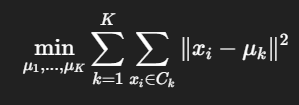

Whereby;

- 𝑋
=
{
𝑥
1
,
𝑥
2
,
.
.
.
,
𝑥
𝑛
}
X={x 
1
​
 ,x 
2
​
 ,...,x 
n
​
 } be your scaled weather data points, where each 
𝑥
𝑖
∈
𝑅
𝑑
x 
i
​
 ∈R 
d
  (in your case, 
𝑑
=
7
d=7 features).

- 𝜇
𝑘
μ 
k
​
  be the centroid of cluster 
𝑘
k

- C 
k
​
  be the set of points assigned to cluster 
𝑘
k

- Where 
∥
𝑥
𝑖
−
𝜇
𝑘
∥
2
∥x 
i
​
 −μ 
k
​
 ∥ 
2
  is the squared Euclidean distance from a point to its centroid.

Let's go through each step just as will be done in the code.  


### 1. Initialize Centroids

Randomly selecting 
𝑘
k points from the dataset as the initial centroids 
𝜇
1
,
.
.
.
,
𝜇
𝑘
μ 
1
​
 ,...,μ 
k
​
 .

### 2. Assign Each Point to the Nearest Centroid

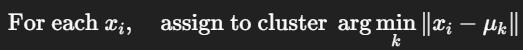

In this we compute the Euclidean distance between every point and every centroid and assigning each point to the nearest one.


### 3. Update Centroids by Recalculating:

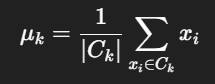

For each cluster, we take the mean of all assigned points — this becomes the new centroid.



### 4. Checking for Convergence

Now we check if the change in centroids is smaller than a set threshold 
𝜖
ϵ, using:

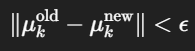

So if all centroids have moved less than this threshold, we say the algorithm has converged.

### **Code Implementation**

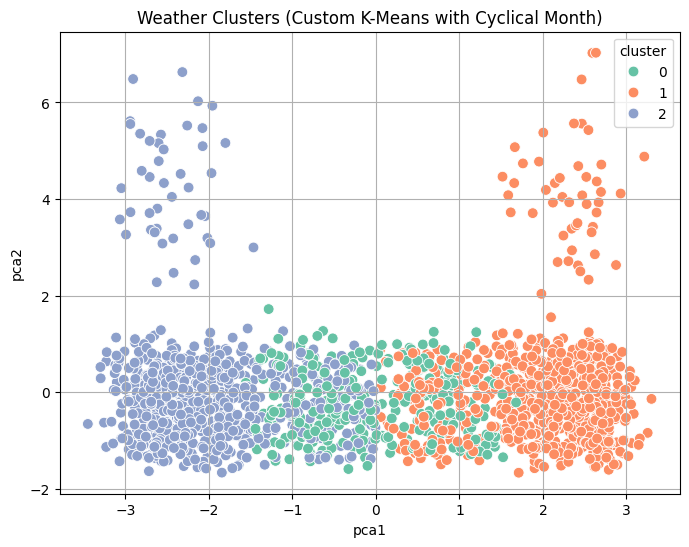

         max_temp  min_temp  humidity  wind_speed  precipitation  pressure  \
cluster                                                                      
0           85.08     65.34     72.48       10.53           0.10   1013.20   
1           99.00     79.75     72.97       10.46           0.21   1012.90   
2           71.01     50.44     73.14       10.35           0.21   1013.05   

         solar_radiation  month_sin  month_cos  
cluster                                         
0                 248.92       0.24       0.92  
1                 357.50       0.64      -0.39  
2                 142.72      -0.74      -0.01  


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Extracting Month as Cyclical Features
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# 2. Select Features 
features = ['max_temp', 'min_temp', 'humidity', 'wind_speed',
            'precipitation', 'pressure', 'solar_radiation',
            'month_sin', 'month_cos']
X = df[features]

# 3. Scale the Features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Custom K-Means Functions 
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def has_converged(old_centroids, new_centroids, tol=1e-4):
    return np.all(np.linalg.norm(old_centroids - new_centroids, axis=1) < tol)

def custom_kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# Run Custom K-Means 
K = 3  
labels, centroids = custom_kmeans(X_scaled, K)
df['cluster'] = labels

# 6. Visualize with PCA 
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sb.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2', s=60)
plt.title('Weather Clusters (Custom K-Means with Cyclical Month)')
plt.grid(True)
plt.show()

# Cluster Interpretation 
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary.round(2))


##### **Interpretation of Evaluation Graph**

For the purpose of this notebook and task, the data was split into 3 clusters. Here are the clusters and what they mean and their intepreatations.

**Cluster 0 (Orange, Right Side)**  

- These are warm days (but not as hot as Cluster 1)

- Medium sunlight (solar radiation ~249)

- These days are with less rain than the others

- The time of year based on month features, these are spring or fall months (March–May or September–October)


**Cluster 1 (Green, Center)**  

- These are the hottest days with average maximum temperature of  ~99°F!

- These are the days with the highest sunlight (that is solar radiation ~358)

- The days here are still humid and with some rain (like summer storms)

- The time of the year based on sine/cosine of month, this happens in summer (July/August)


**Cluster 2 (Blue, Left Side)**  

- These are the coldest of all clusters with average maximum temperature ~71°F

- The days have the lowest sunlight with solar radiation ~143

- The days here are still humid (~73%), with more precipitation

- The time of year based on the month_sin and month_cos values, these days fall mostly in winter (around December–February)

________

## **Conclusion and Final Notes**

This notebook uses K-Means clustering, an unsupervised learning technique, to find natural groupings in Texas meteorological data.  Using factors like temperature, humidity, wind, precipitation, and more, the goal was to recognize and comprehend recurrent weather patterns throughout the year.  Together with Python implementation, the mathematical reasoning behind K-Means was examined.  Clusters were analyzed both visually and quantitatively, and results were displayed using PCA for dimensionality reduction.

### Final Notes

- In order to reflect seasonal patterns, the date column was transformed into a cyclical month feature using sine and cosine transformations. The dataset also contained daily weather features.

- To make sure that K-Means distances were balanced and understandable across scales, all pertinent numerical features were normalized using StandardScaler.

- K-Means algorithm was created with cluster assignment, convergence checking, distance computation, and centroid initialization.

- Clustering was performed with k=3, and the results revealed three distinct weather patterns:

    - Cluster 0-Warm & Mild: These days included moderate temperatures, little precipitation, and medium amounts of sunlight, which are typical of spring or fall.

    - Cluster 1: Hot & Bright: This cluster, which reflected summer circumstances, had the maximum sun radiation and temperatures along with some humidity and precipitation (probably summer storms).

    - Cluster 2: Cool and Rainy: This cluster reflected winter days with the lowest temperatures and sunlight, as well as more clouds and rain.

The data was reduced to two dimensions for display using PCA.  The data's significant structure was confirmed by the clusters' obvious separation.    

